In [1]:
import pandas as pd
import sklearn
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt

plt.style.use(['dark_background'])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


<Figure size 432x288 with 0 Axes>

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
minmax  =   train.min().to_frame()
minmax[1]   =   train.max().to_frame()
minmax

,0,1
battery_power,501.0,1998.0
blue,0.0,1.0
clock_speed,0.5,3.0
dual_sim,0.0,1.0
fc,0.0,19.0
four_g,0.0,1.0
int_memory,2.0,64.0
m_dep,0.1,1.0
mobile_wt,80.0,200.0
n_cores,1.0,8.0


price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ram, dtype: object

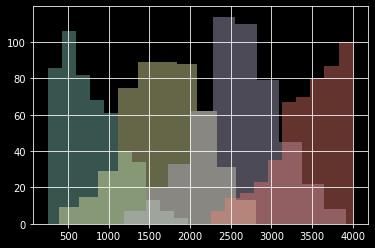

In [5]:
train.groupby('price_range').ram.hist(alpha=0.4)

<AxesSubplot:>

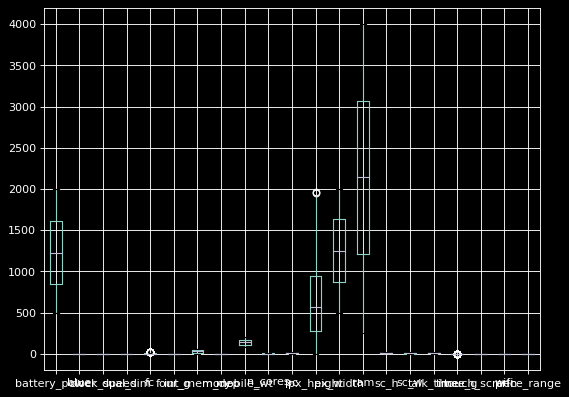

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
train.boxplot()

In [7]:
binary  =   ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
non_binary  =   [col for col in train.columns if col not in binary]
print(binary, non_binary, sep='\n')

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler  =   MinMaxScaler()
df  =   pd.DataFrame(scaler.fit_transform(train.drop('price_range', axis=1).values), columns=train.drop('price_range', axis=1).columns)
scaled_train   =   pd.concat([df, train.price_range], axis=1)

In [9]:
def train_svc(x, y, C=1, kernel='rbf', gamma='scale', degree=3, break_ties=False, decision_function_shape='ovr'):
    from sklearn.svm import SVC
    clf =   SVC(C=C, kernel=kernel, degree=degree, break_ties=break_ties, decision_function_shape=decision_function_shape)
    clf.fit(x, y)
    print(f'kernel: {kernel}, deg: {degree} gamma: {gamma} score: ', clf.score(x, y))
    return clf

In [10]:
from sklearn.svm import SVC

x_train    =   train.drop('price_range', axis=1)
y_train =   train.price_range
scaled_x_train    =   scaled_train.drop('price_range', axis=1)

_   =   train_svc(x_train, y_train)
_   =   train_svc(scaled_x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.955
kernel: rbf, deg: 3 gamma: scale score:  0.972


In [12]:
# use different kernels
_   =   train_svc(scaled_x_train, y_train, kernel='linear')
_   =   train_svc(scaled_x_train, y_train, kernel='poly')
_   =   train_svc(scaled_x_train, y_train, kernel='poly', degree=4)
_   =   train_svc(scaled_x_train, y_train, kernel='poly', degree=5)
_   =   train_svc(scaled_x_train, y_train, kernel='poly', degree=6)

#   use different gamma
_   =   train_svc(scaled_x_train, y_train, kernel='rbf', gamma='auto')
_   =   train_svc(scaled_x_train, y_train, kernel='poly', gamma='auto')
_   =   train_svc(scaled_x_train, y_train, kernel='sigmoid', gamma='auto')

kernel: linear, deg: 3 gamma: scale score:  0.965
kernel: poly, deg: 3 gamma: scale score:  0.992
kernel: poly, deg: 4 gamma: scale score:  0.9995
kernel: poly, deg: 5 gamma: scale score:  0.9995
kernel: poly, deg: 6 gamma: scale score:  0.999
kernel: rbf, deg: 3 gamma: auto score:  0.972
kernel: poly, deg: 3 gamma: auto score:  0.992
kernel: sigmoid, deg: 3 gamma: auto score:  0.2245


In [112]:
#   4
#   Soft Margin / Hard Margin: use different C
#   Soft Margin
print('C', 0.1)
_   =   train_svc(scaled_x_train, y_train, kernel='poly', degree=4, C=0.1)
#   Hard Margin
print('C', 2)
_   =   train_svc(scaled_x_train, y_train, kernel='poly', degree=4, C=2)


C 0.1
kernel: poly, deg: 4 gamma: scale score:  0.97
C 2
kernel: poly, deg: 4 gamma: scale score:  1.0


In [11]:
#   5.1
def binner(arr, strategy, n_bins, encode='ordinal'):
    from sklearn.preprocessing import KBinsDiscretizer
    import matplotlib.pyplot as plt
    
    print(f'Strategy: {strategy}, Encoder: {encode}, n_bins: {n_bins}')
    bins    =   KBinsDiscretizer(encode=encode, strategy=strategy, n_bins=n_bins)
    binned_arr  =   bins.fit_transform(arr)
    plt.hist(binned_arr, bins=n_bins)
    plt.show()

    return binned_arr

In [131]:
len(train.battery_power.unique())

1094

In [13]:
batt_power  =   train.battery_power.to_numpy().reshape(train.shape[0], 1)

Strategy: uniform, Encoder: ordinal, n_bins: 150


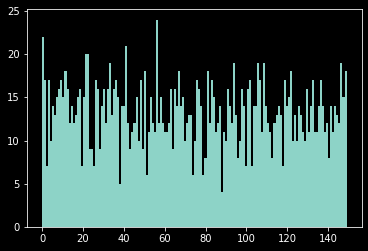

Strategy: uniform, Encoder: ordinal, n_bins: 100


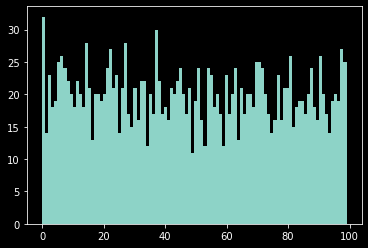

Strategy: uniform, Encoder: ordinal, n_bins: 50


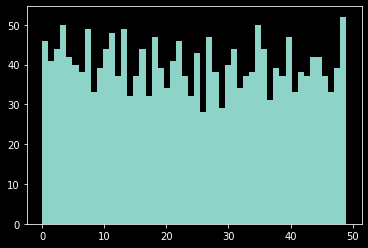

Strategy: kmeans, Encoder: ordinal, n_bins: 150


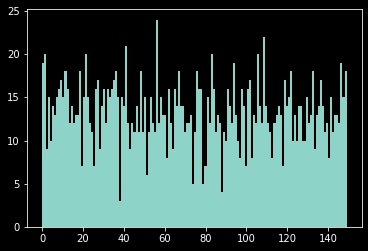

Strategy: kmeans, Encoder: ordinal, n_bins: 100


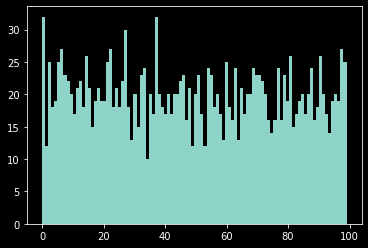

Strategy: kmeans, Encoder: ordinal, n_bins: 50


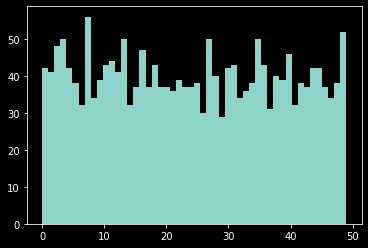

Strategy: quantile, Encoder: ordinal, n_bins: 150


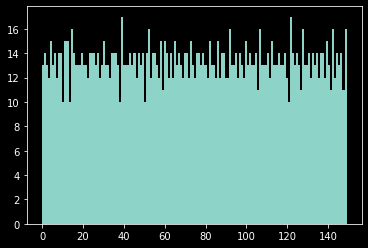

Strategy: quantile, Encoder: ordinal, n_bins: 100


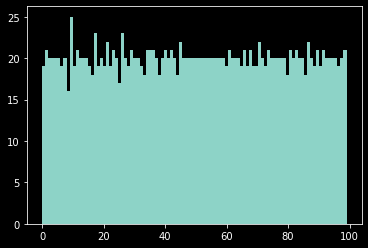

Strategy: quantile, Encoder: ordinal, n_bins: 50


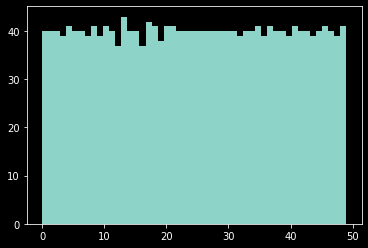

In [14]:
uniform_bin =   binner(batt_power, 'uniform', 150)
uniform_bin =   binner(batt_power, 'uniform', 100)
uniform_bin =   binner(batt_power, 'uniform', 50)
kmeans_bin  =   binner(batt_power, 'kmeans', 150)
kmeans_bin  =   binner(batt_power, 'kmeans', 100)
kmeans_bin  =   binner(batt_power, 'kmeans', 50)
quantile_bin=   binner(batt_power, 'quantile', 150)
quantile_bin=   binner(batt_power, 'quantile', 100)
quantile_bin=   binner(batt_power, 'quantile', 50)

In [85]:
#   5.2
from sklearn.preprocessing import OneHotEncoder

categorical_col =   ['n_cores']
one_hot_encoded =   pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(train[categorical_col]))
one_hot_encoded.head(1)

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>],

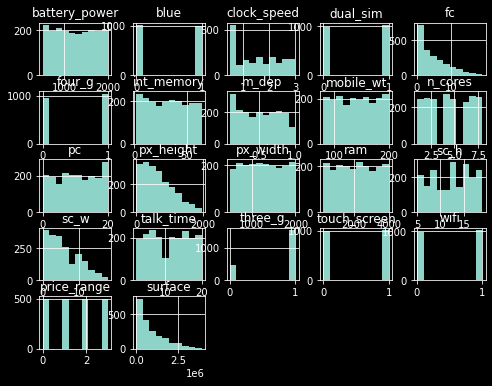

In [27]:
#   5.3
train.hist(figsize=(8,6))

In [44]:
skewed_cols =   ['fc', 'sc_w', 'surface', 'px_height']

array([[<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'surface'}>,
        <AxesSubplot:title={'center':'px_height'}>]], dtype=object)

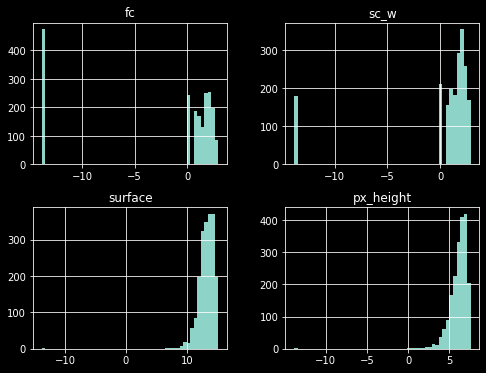

In [45]:
#   Log Transformation

log_transformed =   train[skewed_cols].applymap(lambda x: np.log(x+0.000001))
log_transformed.hist(figsize=(8,6), bins=50)

array([[<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'surface'}>,
        <AxesSubplot:title={'center':'px_height'}>]], dtype=object)

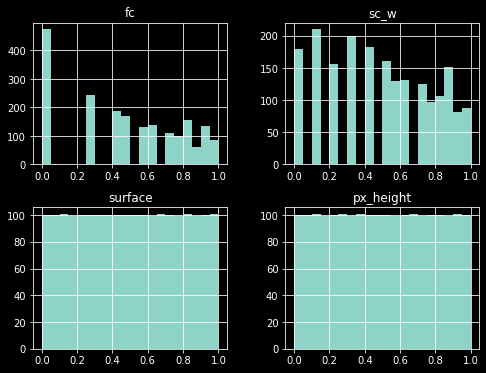

In [46]:
#   Mapping to uniform distribution
from sklearn.preprocessing import QuantileTransformer

quantile_transformed    =   pd.DataFrame(QuantileTransformer(random_state=0).fit_transform(train[skewed_cols]), columns=skewed_cols)
quantile_transformed.hist(bins=20, figsize=(8,6))

Box-Cox Transform:
\begin{split}x_i^{(\lambda)} =
\begin{cases}
\dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
\ln{(x_i)} & \text{if } \lambda = 0,
\end{cases}\end{split}

array([[<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'surface'}>,
        <AxesSubplot:title={'center':'px_height'}>]], dtype=object)

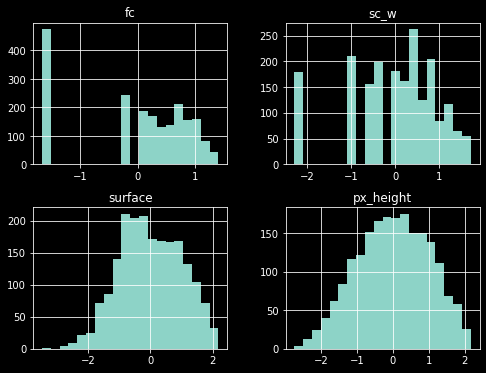

In [47]:
#   Mapping to Gaussian distribution (Box-Cox)
from sklearn.preprocessing import PowerTransformer

box_transformed    =   pd.DataFrame(PowerTransformer(method='box-cox').fit_transform(train[skewed_cols].add(0.00001)), columns=skewed_cols)
box_transformed.hist(bins=20, figsize=(8,6))

Yeo-Johnson Transform
\begin{split}x_i^{(\lambda)} =
\begin{cases}
 [(x_i + 1)^\lambda - 1] / \lambda & \text{if } \lambda \neq 0, x_i \geq 0, \\[8pt]
\ln{(x_i + 1)} & \text{if } \lambda = 0, x_i \geq 0 \\[8pt]
-[(-x_i + 1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{if } \lambda \neq 2, x_i < 0, \\[8pt]
 - \ln (- x_i + 1) & \text{if } \lambda = 2, x_i < 0
\end{cases}\end{split}

array([[<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'surface'}>,
        <AxesSubplot:title={'center':'px_height'}>]], dtype=object)

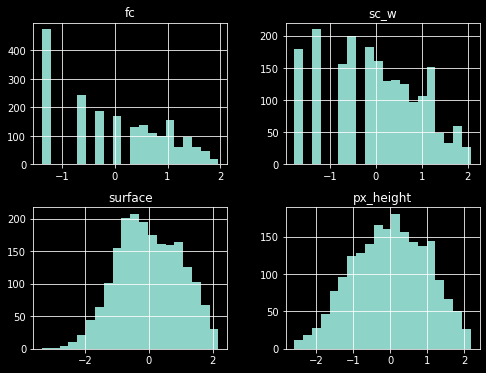

In [49]:
yeo_transformed    =   pd.DataFrame(PowerTransformer(method='yeo-johnson').fit_transform(train[skewed_cols]), columns=skewed_cols)
yeo_transformed.hist(bins=20, figsize=(8,6))

In [15]:
#   5.4
train['surface']    =   train.px_width*train.px_height
train[['surface', 'px_width', 'px_height']].head(1)

,surface,px_width,px_height
0,15120,756,20


In [74]:
#   6
#   svm with binned battery power
temp    =   x_train.copy()
temp['battery_power']   =   uniform_bin
_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.809
kernel: rbf, deg: 3 gamma: scale score:  0.955


In [100]:
#   svm with one-hot coded categorical columns
temp    =   x_train.drop(categorical_col, axis=1).copy()
scaled_temp    =   scaled_x_train.drop(categorical_col, axis=1).copy()

temp   =   pd.concat([temp, one_hot_encoded], axis=1)
scaled_temp =   pd.concat([scaled_temp, one_hot_encoded], axis=1)

_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)
_   =   train_svc(scaled_temp, y_train)
_   =   train_svc(scaled_x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.956
kernel: rbf, deg: 3 gamma: scale score:  0.955
kernel: rbf, deg: 3 gamma: scale score:  0.9735
kernel: rbf, deg: 3 gamma: scale score:  0.972


In [84]:
#   svm with log transformed features
temp    =   x_train.copy()
scaled_temp    =   scaled_x_train.copy()

temp[skewed_cols]   =   log_transformed
scaled_temp[skewed_cols]   =   log_transformed

_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)
_   =   train_svc(scaled_temp, y_train)
_   =   train_svc(scaled_x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.899
kernel: rbf, deg: 3 gamma: scale score:  0.955
kernel: rbf, deg: 3 gamma: scale score:  0.45
kernel: rbf, deg: 3 gamma: scale score:  0.972


In [83]:
#   svm with box-cox transformed features
temp    =   x_train.copy()
scaled_temp    =   scaled_x_train.copy()

temp[skewed_cols]   =   box_transformed
scaled_temp[skewed_cols]   =   box_transformed

_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)
_   =   train_svc(scaled_temp, y_train)
_   =   train_svc(scaled_x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.8985
kernel: rbf, deg: 3 gamma: scale score:  0.955
kernel: rbf, deg: 3 gamma: scale score:  0.937
kernel: rbf, deg: 3 gamma: scale score:  0.972


In [82]:
#   svm with yeo-johnson transformed features
temp    =   x_train.copy()
scaled_temp    =   scaled_x_train.copy()

temp[skewed_cols]   =   yeo_transformed
scaled_temp[skewed_cols]   =   yeo_transformed

_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)
_   =   train_svc(scaled_temp, y_train)
_   =   train_svc(scaled_x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.8985
kernel: rbf, deg: 3 gamma: scale score:  0.955
kernel: rbf, deg: 3 gamma: scale score:  0.937
kernel: rbf, deg: 3 gamma: scale score:  0.972


In [81]:
#   svm with quantile transformed features
temp    =   x_train.copy()
scaled_temp    =   scaled_x_train.copy()

temp[skewed_cols]   =   quantile_transformed
scaled_temp[skewed_cols]   =   quantile_transformed

_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)
_   =   train_svc(scaled_temp, y_train)
_   =   train_svc(scaled_x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.8985
kernel: rbf, deg: 3 gamma: scale score:  0.955
kernel: rbf, deg: 3 gamma: scale score:  0.971
kernel: rbf, deg: 3 gamma: scale score:  0.972


In [102]:
#   svm with new added feature
temp    =   x_train.copy()
temp['surface']  =   x_train.px_width*x_train.px_height

_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.296
kernel: rbf, deg: 3 gamma: scale score:  0.955


In [103]:
#   all combined (expcept surface feature)
temp    =   x_train.drop(categorical_col, axis=1).copy()

temp   =   pd.concat([temp, one_hot_encoded], axis=1)
temp['battery_power']   =   uniform_bin
temp[skewed_cols]   =   quantile_transformed

_   =   train_svc(temp, y_train)
_   =   train_svc(x_train, y_train)

kernel: rbf, deg: 3 gamma: scale score:  0.79
kernel: rbf, deg: 3 gamma: scale score:  0.955


In [14]:
#   8
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf =   DecisionTreeClassifier(random_state=0)
cross_val_score(clf, x_train, y_train, cv=10).mean()

0.8385

In [123]:
#   9
for depth in range(1, 20, 4):
    print(f'Depth: {depth}, accuracy: {DecisionTreeClassifier(max_depth=depth).fit(x_train, y_train).score(x_train, y_train)}')

Depth: 1, accuracy: 0.5
Depth: 5, accuracy: 0.882
Depth: 9, accuracy: 0.988
Depth: 13, accuracy: 1.0
Depth: 17, accuracy: 1.0


In [120]:
for i in range(20, 0, -5):
    clf =   DecisionTreeClassifier(min_samples_leaf=i).fit(x_train, y_train)
    print(f'no. of samples per leaf: {i}, accuracy: {clf.score(x_train, y_train)}')

no. of samples per leaf: 20, accuracy: 0.8825
no. of samples per leaf: 15, accuracy: 0.892
no. of samples per leaf: 10, accuracy: 0.9085
no. of samples per leaf: 5, accuracy: 0.944


In [24]:
#   11
#   Prunnning

for alpha in np.linspace(0,0.5, 10):
    clf =   DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    print(f'Alpha: {alpha:.2f}, accuracy: {cross_val_score(clf, x_train, y_train, cv=10).mean():.2f}')

Alpha: 0.00, accuracy: 0.84
Alpha: 0.06, accuracy: 0.75
Alpha: 0.11, accuracy: 0.54
Alpha: 0.17, accuracy: 0.50
Alpha: 0.22, accuracy: 0.25
Alpha: 0.28, accuracy: 0.25
Alpha: 0.33, accuracy: 0.25
Alpha: 0.39, accuracy: 0.25
Alpha: 0.44, accuracy: 0.25
Alpha: 0.50, accuracy: 0.25


In [23]:
#   12
from sklearn.ensemble import RandomForestClassifier

clf =   RandomForestClassifier()
cross_val_score(clf, x_train, y_train, cv=10).mean()

0.882